In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
from sklearn import preprocessing
from IPython.display import Image
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python\US_Accidents_Dec20.csv")
print(df)

                ID    Source    TMC  Severity           Start_Time  \
0              A-1  MapQuest  201.0         3  2016-02-08 05:46:00   
1              A-2  MapQuest  201.0         2  2016-02-08 06:07:59   
2              A-3  MapQuest  201.0         2  2016-02-08 06:49:27   
3              A-4  MapQuest  201.0         3  2016-02-08 07:23:34   
4              A-5  MapQuest  201.0         2  2016-02-08 07:39:07   
...            ...       ...    ...       ...                  ...   
4229389  A-4239402      Bing    NaN         2  2019-08-23 18:03:25   
4229390  A-4239403      Bing    NaN         2  2019-08-23 19:11:30   
4229391  A-4239404      Bing    NaN         2  2019-08-23 19:00:21   
4229392  A-4239405      Bing    NaN         2  2019-08-23 19:00:21   
4229393  A-4239406      Bing    NaN         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1      

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df['Start_Time'].dtypes

dtype('O')

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Time'] = df['Start_Time'].dt.normalize()
df['Start_Time'].dtypes

dtype('<M8[ns]')

In [6]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df_clean = df.drop(columns = ['End_Time', 'Temperature(F)', 'Wind_Chill(F)', 
                                  'End_Lat', 'End_Lng', 
                                  'Humidity(%)', 'Pressure(in)',
                                   'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                                   'Precipitation(in)','Amenity', 'Bump', 'Crossing', 'Number',
                                  'Street', 'Side', 'City', 'County', 'State',
                                   'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                                   'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                                   'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                                   'Astronomical_Twilight', 'Timezone','Airport_Code','Weather_Timestamp' ])

In [8]:
df_clean.isnull().sum()

ID                         0
Source                     0
TMC                  1512917
Severity                   0
Start_Time                 0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Description                2
Zipcode                 1291
Country                    0
Weather_Condition      98282
dtype: int64

In [9]:
df_year = df[(df['Start_Time'] > '2016-08-23') &
                (df['Start_Time'] <= '2019-08-23')]


In [10]:
traffic_codes = df['TMC'].value_counts()
traffic_codes = pd.DataFrame(traffic_codes)
traffic_codes.reset_index()
traffic_codes.index.names = ['Code']
traffic_codes.head()

,TMC
Code,
201.0,2264385
241.0,284371
245.0,51670
229.0,23171
203.0,18536


In [11]:
event_codes = pd.read_html('https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List')

In [12]:
codes = event_codes[0].drop(columns = ['N','Q','T','D','U','C','R'])

In [13]:
codes.head()

,Code,Description
0,1,traffic problem
1,2,queuing traffic (with average speeds Q). Dange...
2,11,overheight warning system triggered
3,12,"(Q) accident(s), traffic being directed around..."
4,16,"closed, rescue and recovery work in progress"


In [14]:
df_codes = codes.merge(traffic_codes, left_on='Code', right_on='Code')
df_codes = df_codes.rename(columns = {'TMC':'# of Accidents'})

In [15]:
df_codes.sort_values(by = '# of Accidents',ascending = False)

,Code,Description,# of Accidents
1,201,(Q) accident(s),2264385
9,241,(Q) accident(s). Right lane blocked,284371
11,245,(Q) accident(s). Two lanes blocked,51670
6,229,(Q) accident(s). Slow traffic,23171
3,203,multi-vehicle accident (involving Q vehicles),18536
5,222,(Q) accident(s). Queuing traffic,13611
10,244,(Q) accident(s). Hard shoulder blocked,13101
20,406,(Q th) entry slip road closed,12815
12,246,(Q) accident(s). Three lanes blocked,9019
18,343,(Q) earlier accident(s),8073


In [16]:
severity_time = df_year[['Severity','Start_Time']]
severity_time['Start_Time'] = severity_time['Start_Time'].dt.date
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts()
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts().unstack(level = 1)
sev_count.reset_index(level=0, inplace=True)
sev_count.head()

<ipython-input-16-1b613f1eaed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_time['Start_Time'] = severity_time['Start_Time'].dt.date


Severity,Start_Time,1,2,3,4
0,2016-08-24,3.0,1606.0,634.0,74.0
1,2016-08-25,NaN,1364.0,652.0,62.0
2,2016-08-26,3.0,1572.0,680.0,73.0
3,2016-08-27,2.0,355.0,308.0,38.0
4,2016-08-28,2.0,326.0,298.0,61.0


In [17]:
accidents_by_state = [df_year[df_year['State'] == i].count()['ID'] 
                      for i in df_year.State.unique()]
accidents_by_state.sort(reverse = True)
states = df_year.State.unique()
state_severity = df_year[['Severity', 'ID', 'State']]
grouped = state_severity.groupby(['State']).sum().reset_index()
sort_grouped = grouped.sort_values(by = 'Severity', ascending = False)
sort_grouped.head()


,State,Severity
3,CA,1107567
41,TX,583663
8,FL,456182
32,NY,284279
38,SC,272434


In [18]:
stateabbr = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')[0]
stateabbr.head()

Flag, name andpostal abbreviation[12]  \
  Flag, name andpostal abbreviation[12]   
0                               Alabama   
1                                Alaska   
2                               Arizona   
3                              Arkansas   
4                            California   

                                                Cities               \
  Flag, name andpostal abbreviation[12].1      Capital  Largest[16]   
0                                      AL   Montgomery   Birmingham   
1                                      AK       Juneau    Anchorage   
2                                      AZ      Phoenix      Phoenix   
3                                      AR  Little Rock  Little Rock   
4                                      CA   Sacramento  Los Angeles   

  Ratification oradmission[C] Population[D][14] Total area[15]           \
  Ratification oradmission[C] Population[D][14]            mi2      km2   
0                Dec 14, 1819           4903185          52420   135767   
1                 Jan 3, 1959            731545         665384  1723337   
2                Feb 14, 1912           7278717         113990   295234   
3                Jun 15, 1836           3017804          53179   137732   
4                 Sep 9, 1850          39512223         163695   423967   

  Land area[15]          Water area[15]         Numberof Reps.  
            mi2      km2            mi2     km2 Numberof Reps.  
0         50645   131171           1775    4597              7  
1        570641  1477953          94743  245384              1  
2        113594   294207            396    1026              9  
3         52035   134771           1143    2961              4  
4        155779   403466           7916   20501             53

In [28]:
state_list = stateabbr.values
state_list = pd.DataFrame(state_list)
state_list = state_list[[0,1]]
state_list = state_list.rename(columns = {0:'Long',1:'State'})
state_list.head()

,Long,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [29]:
df = pd.read_html('https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States')[0]
df = df.drop(['Type of law','Date of first law','Who is covered','Base fine before fees'], axis = 1)
df = df.rename(columns = {'State, federal district, or territory':'State','Seat BeltUsage (2017)[7][note 2]':'Seatbelt'})
df = df.drop(52) ### Wake Island has no data.
df.sort_values(by = 'Seatbelt', ascending = False).head()


,State,Seatbelt
11,Georgia,97.1%
13,Hawaii,96.9%
40,Oregon,96.8%
5,California,96.2%
53,Washington,94.8%


In [30]:
df_states = sort_grouped.merge(state_list, left_on='State', right_on='State')
df_states = df_states.rename(columns = {'State':'Abbv','Long':'State'})
df_states.head()

,Abbv,Severity,State
0,CA,1107567,California
1,TX,583663,Texas
2,FL,456182,Florida
3,NY,284279,New York
4,SC,272434,South Carolina


In [31]:
df_states_full = df_states.merge(df, left_on = 'State', right_on='State')
df_states_full = df_states_full[['Abbv','State','Severity','Seatbelt']]
df_states_full['Seatbelt'] = df_states_full['Seatbelt'].str.replace('%','')
df_states_full.sort_values(by = 'Severity', ascending = False).head()

,Abbv,State,Severity,Seatbelt
0,CA,California,1107567,96.2
1,TX,Texas,583663,91.9
2,FL,Florida,456182,90.2
3,NY,New York,284279,93.4
4,SC,South Carolina,272434,92.3


In [32]:
df_states_full.Seatbelt = df_states_full.Seatbelt.astype(str).astype(float)
df_states_full.dtypes

Abbv         object
State        object
Severity      int64
Seatbelt    float64
dtype: object

In [33]:
top_grouped = state_list.merge(sort_grouped, left_on='State', right_on='State')
top_grouped = top_grouped.sort_values(by = 'Severity', ascending = False)
top_grouped.Long = top_grouped.Long.str.replace(("[['E']]"),"")
top_grouped.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:710: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


,Long,State,Severity
3,California,CA,1107567
40,Texas,TX,583663
7,Florida,FL,456182
29,New York,NY,284279
37,South Carolina,SC,272434


Text(0, 0.5, 'State')

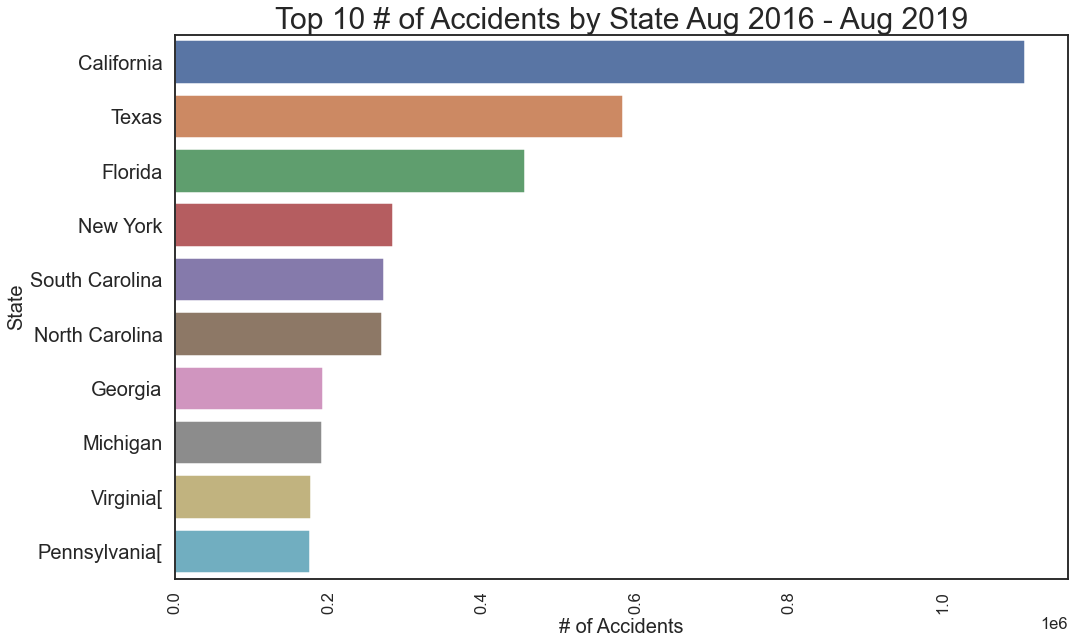

In [35]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = top_grouped['Severity'], y = top_grouped['Long'].head(10))
plt.xticks(rotation=90)
plt.yticks(fontsize = 20)
plt.title('Top 10 # of Accidents by State Aug 2016 - Aug 2019', fontsize = 30)
plt.xlabel('# of Accidents', fontsize = 20)
plt.ylabel('State', fontsize = 20)

In [37]:
severities4_state = df[df['Severity'] == 4]['State'].value_counts()
severities3_state = df[df['Severity'] == 3]['State'].value_counts()
severities2_state = df[df['Severity'] == 2]['State'].value_counts()
severities1_state = df[df['Severity'] == 1]['State'].value_counts()
names = ['Severity 4', 'Severity 3', 'Severity 2', 'Severity 1']

KeyError: 'Severity'